In [1]:
#Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading file
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   2

In [4]:
#check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see there are no null values in the dataset.
now we proceed with some graphs

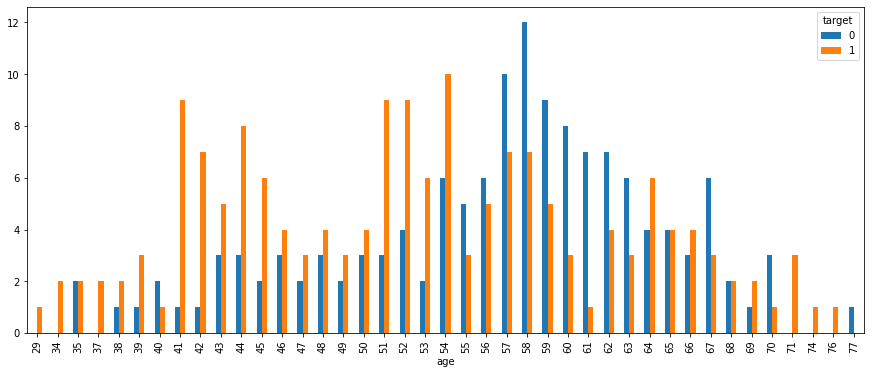

In [15]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(15,6))
plt.show()

Looks like dataset has more records with patients having heart disease

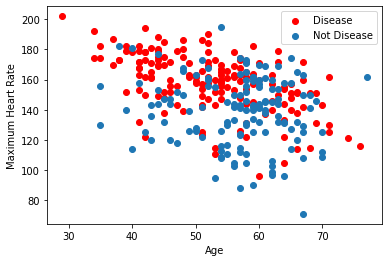

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

looks like with high heart rate there are more chances of heart disease

In [5]:
#seperating target and features
y=df['target']
y
x=df.drop(['target'],axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [0]:
#Slitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state = 42)


In [7]:
m1=LogisticRegression(solver='liblinear', multi_class='ovr')
m2=LinearDiscriminantAnalysis()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=GaussianNB()
m6=SVC(gamma='auto')
models = []
models.append(('LR', m1))
models.append(('LDA', m2))
models.append(('KNN', m3))
models.append(('CART', m4))
models.append(('NB', m5))
models.append(('SVM', m6))
# evaluate each model in turn
results = []
names = []
for name,m in models:
  m.fit(x_train,y_train)
  pred3=m.predict(x_test)
  sc=accuracy_score(y_test,pred3)
  results.append(sc)
  names.append(name)
  print( (name, sc))


('LR', 0.8131868131868132)
('LDA', 0.8021978021978022)
('KNN', 0.6593406593406593)
('CART', 0.7142857142857143)
('NB', 0.8351648351648352)
('SVM', 0.5604395604395604)


Here maximum accuracy we got is 83.51% 

Lets try to improve the accuracy

In [8]:
#Performing Normalization on data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)
x

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state = 42)


In [10]:
m1=LogisticRegression(solver='liblinear', multi_class='ovr')
m2=LinearDiscriminantAnalysis()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=GaussianNB()
m6=SVC(gamma='auto')
models = []
models.append(('LR', m1))
models.append(('LDA', m2))
models.append(('KNN', m3))
models.append(('CART', m4))
models.append(('NB', m5))
models.append(('SVM', m6))
# evaluate each model in turn
results = []
names = []
for name,m in models:
  m.fit(x_train,y_train)
  pred3=m.predict(x_test)
  sc=accuracy_score(y_test,pred3)
  results.append(sc)
  names.append(name)
  print( (name, sc))


('LR', 0.7912087912087912)
('LDA', 0.8021978021978022)
('KNN', 0.7802197802197802)
('CART', 0.7252747252747253)
('NB', 0.8351648351648352)
('SVM', 0.8461538461538461)


This time accuracy of every model is increased 

The max accuracy is 84.61% 

Lets further standerdize the dataset and check the accuracy

In [11]:
#Performing standerdization
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(x)
x=s.transform(x)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state = 42)


In [13]:
m1=LogisticRegression(solver='liblinear', multi_class='ovr')
m2=LinearDiscriminantAnalysis()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=GaussianNB()
m6=SVC(gamma='auto')
models = []
models.append(('LR', m1))
models.append(('LDA', m2))
models.append(('KNN', m3))
models.append(('CART', m4))
models.append(('NB', m5))
models.append(('SVM', m6))
# evaluate each model in turn
results = []
names = []
for name,m in models:
  m.fit(x_train,y_train)
  pred3=m.predict(x_test)
  sc=accuracy_score(y_test,pred3)
  results.append(sc)
  names.append(name)
  print( (name, sc))


('LR', 0.8131868131868132)
('LDA', 0.8021978021978022)
('KNN', 0.8791208791208791)
('CART', 0.7252747252747253)
('NB', 0.8351648351648352)
('SVM', 0.8131868131868132)


As we can see maximum accuracy we got after both normalization and standardization of dataset is 87.91% 